In [1]:
import importlib
import generate
# reload if generate.py has changed
importlib.reload(generate)

generate.clear_logs()

results = generate.generate_with_standard_settings()

Generating m08_brainstorm_candidates
  Temperature 0.0
    Trial 1 of 3
        attic table -> antique (storage, wooden, heirloom, secluded)
        queen finger -> ring (jewel, gesture, crown, touch)
        pair chocolate -> fondue (valentine, box, gourmet, gift, truffle)
        pilot hard -> training (test, simulator, military, fighter, endurance, skill)
        dough skate -> roll (rink, blade, frozen, round)
        queen diamond -> regal (tiara, opulence, solitaire, heirloom, coronation, card suit, value)
        punch pair -> boxers (match, combo, duo, knockout)
        mushroom summit -> peak (elevation, nature, gathering)
        genius punch -> smartstrike (brainyblow, knockoutiq, cleverhit, inventivejab, mastermindstrike)
        truck ladder -> firestation (rescue, utility, construction, extendable, elevated)
    Trial 2 of 3
        attic table -> antique (storage, furniture, wood, hidden)
        queen finger -> ring (jewel, crown, touch, gesture)
        pair chocolate 

Method, Temperature, 10%, 50%, 90%
m01_direct, 0.9, 1.00, 1.50, 4.00
m01_direct, 0.5, 1.00, 2.00, 4.00
m01_direct, 0.0, 1.00, 2.00, 3.10
m02_expert, 0.9, 1.00, 2.00, 4.00
m02_expert, 0.5, 1.00, 2.00, 4.00
m02_expert, 0.0, 1.00, 2.00, 4.00
m03_criteria, 0.9, 1.00, 2.00, 4.00
m03_criteria, 0.5, 1.00, 2.00, 3.10
m03_criteria, 0.0, 1.00, 2.00, 4.00
m04_examples, 0.9, 1.00, 2.00, 4.00
m04_examples, 0.5, 1.00, 2.00, 4.00
m04_examples, 0.0, 1.00, 2.00, 4.00
m05_expert_criteria_examples, 0.9, 1.00, 2.00, 4.00
m05_expert_criteria_examples, 0.5, 1.00, 1.00, 4.00
m05_expert_criteria_examples, 0.0, 1.00, 2.00, 4.00
m06_brainstorm, 0.9, 2.00, 3.00, 4.00
m06_brainstorm, 0.5, 2.00, 3.00, 4.00
m06_brainstorm, 0.0, 2.00, 3.00, 4.00
m07_brainstorm_expert_criteria_examples, 0.9, 1.00, 3.00, 4.00
m07_brainstorm_expert_criteria_examples, 0.5, 1.00, 3.00, 4.00
m07_brainstorm_expert_criteria_examples, 0.0, 1.00, 3.00, 4.00
m08_brainstorm_candidates, 0.9, 0.80, 3.00, 4.00
m08_brainstorm_candidates, 0.5, 1.00,

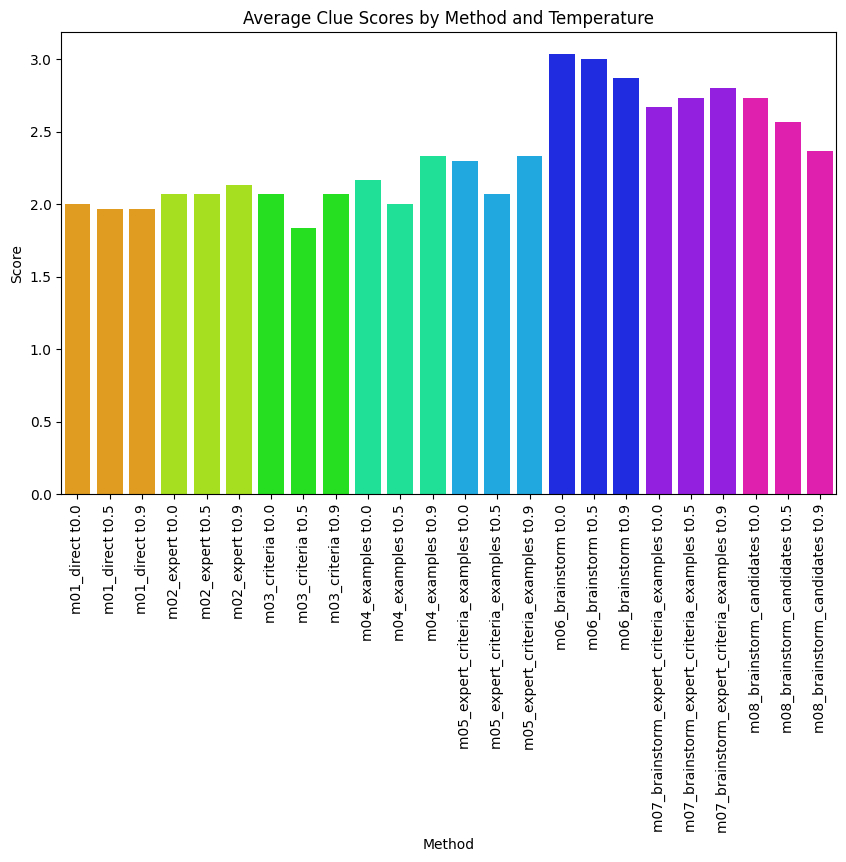

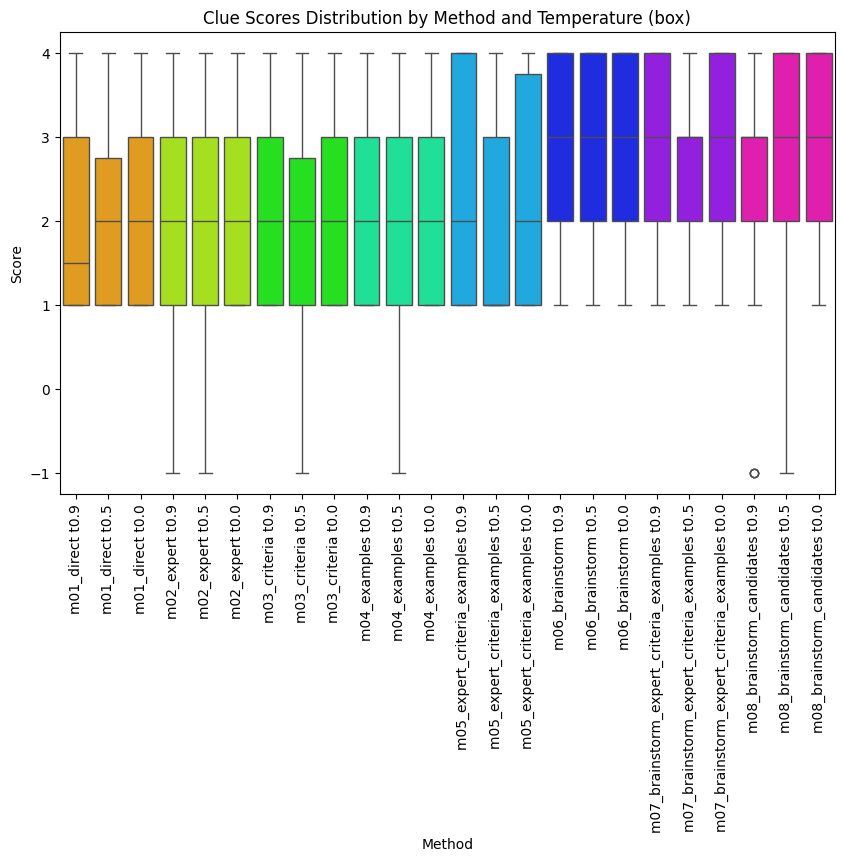

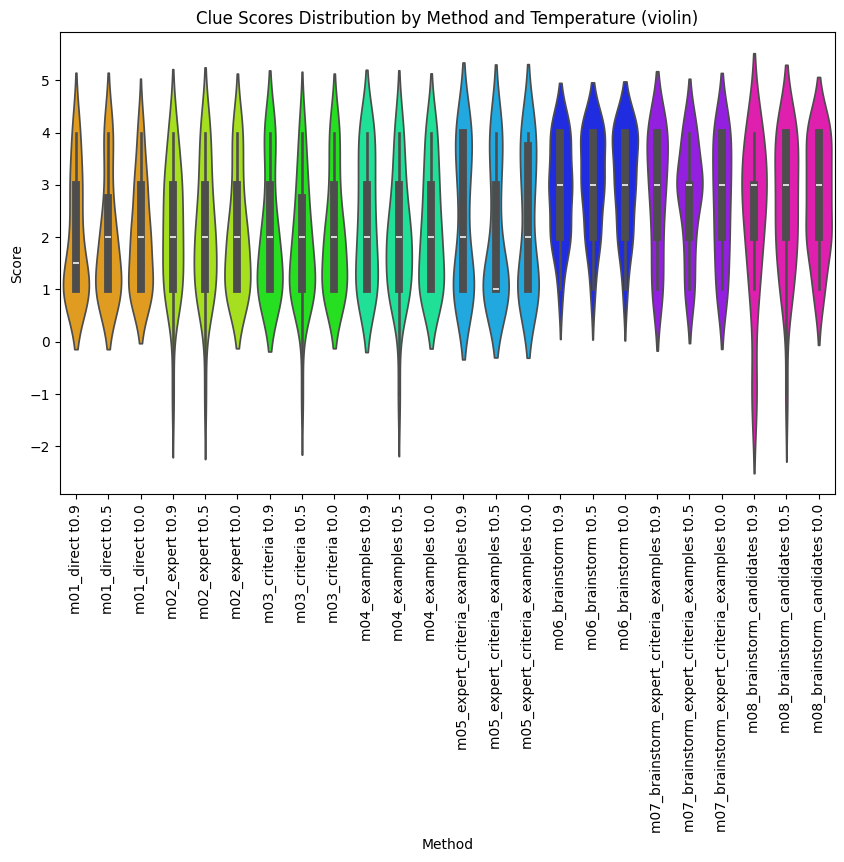

In [2]:
import evaluate
# reload if evaluate.py has changed
importlib.reload(evaluate)

evaluate.evaluate(results)

In [1]:
import importlib
import generate
# reload if generate.py has changed
importlib.reload(generate)

results = generate.generate(
    test_pairs=[
        ["hot", "heart"],
        ["gas", "short"],

        ["drink", "stud"],

        ["camera", "cross"],
    ],
    temperatures=[0.0, 0.5, 0.9],
    trials=1,
    methods=generate.get_methods(["m08"]),
)

Generating m08_brainstorm_candidates
  Temperature 0.0
    Trial 1 of 1
        hot heart -> passion (love, romance, affection, burning, desire)
        gas short -> ration (outage, crisis, limit, cut, tank)
        drink stud -> bachelor (bar, swagger, charm, nightlife)
        camera cross -> watermark (symbol, focus, snapshot)
  Temperature 0.5
    Trial 1 of 1
        hot heart -> passionate (ardor, fiery, warm-hearted, intense, zealous)
        gas short -> ration (crisis, outage, emergency, deficit, limit, conserve)
        drink stud -> bar (bachelor, charm, cocktail, party, macho)
        camera cross -> watermark (focus, exposure, intersection)
  Temperature 0.9
    Trial 1 of 1
        hot heart -> fever (affection, burning, romance, passion, valentines)
        gas short -> scarcity (outage, crisis, ration, tank, limited)
        drink stud -> playboy (bachelor, nightclub, swagger, charm, party)
        camera cross -> watermark (symbol, intersection)
LLM Cache: 12 hits, 0 m